### Iris Flowers Classification Project 

In this project, we will be working on Iris dataset to classify the flowers species, we will follow the whole machine learning project lifecycle and also we will deploy it using flask. Below is the whole outline that we will be following. 

- Loading the imporatant libraries  
- Loading and understanding the Iris data 
- Exploring the data 
- Visualizaing the data  
    - Checking if our data is skewed or not using countplot.  
    - We will plot the grids for every species. 
- Checking Null Values
- Dividing the data 
- Model Development 
    - Using Lr, SVM, Decision Tree, Gradient Boosting 
    - Calculating loss  
    - Training on every algorithm 
    - Choosing the best 
- Saving the Model  

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings 
warnings.filterwarnings('ignore') 

from sklearn.datasets import load_iris

In [8]:
iris = load_iris() 
X = iris.data  
y = iris.target 

data = pd.DataFrame(X,columns=iris.feature_names) 
data["Species"] = y 

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
data.shape

(150, 5)

In [10]:
data["Species"].unique()

array([0, 1, 2])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


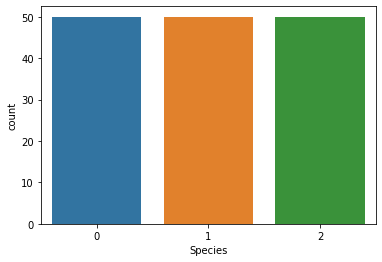

In [14]:
sns.countplot(data["Species"])

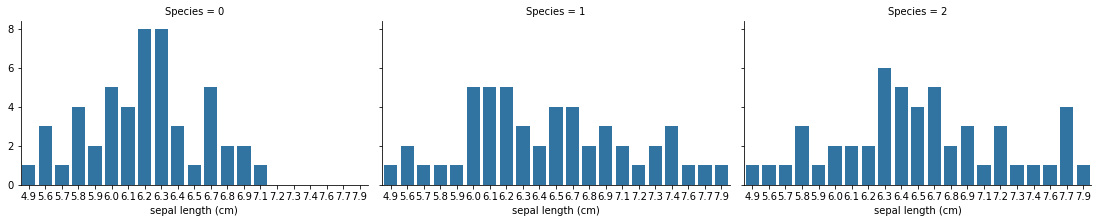

In [17]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'sepal length (cm)')

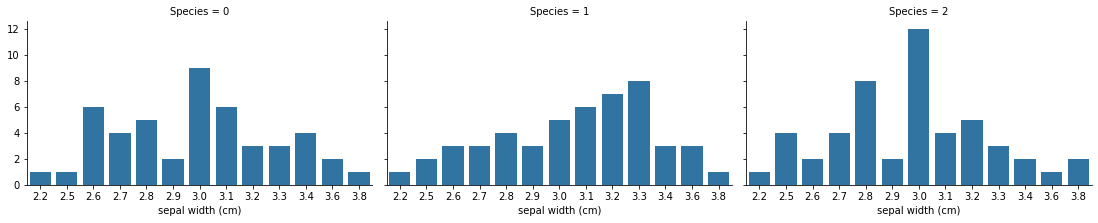

In [18]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'sepal width (cm)')

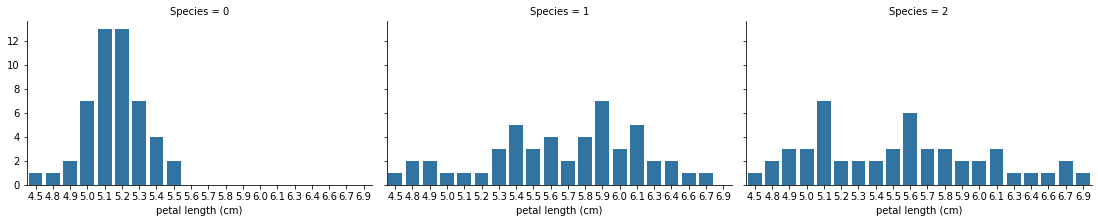

In [20]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal length (cm)')

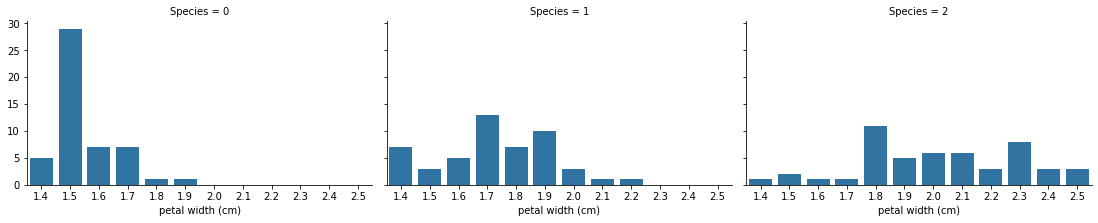

In [19]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal width (cm)')

In [21]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=42) 

In [25]:
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

(135, 4)
(135,)
(15, 4)
(15,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
} 

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [33]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30) 

In [34]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.98
0.9772727272727272
0.9777777777777777
******************************
SVC :
0.98
0.9772727272727272
0.9777777777777777
******************************
DecisionTreeClassifier :
0.5054945054945055
0.6666666666666666
0.674074074074074
******************************
GradientBoostingClassifier :
0.9716553287981861
0.9701805286911669
0.9703703703703703
******************************


In [35]:
gra = GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42) 
gra.fit(X_train, y_train) 

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=3,
                           random_state=42)

In [36]:
gra.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [37]:
import joblib 

joblib.dump(gra, 'model.pkl') 

grad = joblib.load('model.pkl')